Classification of skin lesions using convolutional neural networks: An educational guide
=====================
The aim of this guide is to present a step-by-step approach to people who are interested in working or better understanding the problem of classifying skin lesions. Regardless of the level of knowledge about machine learning, programming and medical concepts.
## Using this guide, you will learn:
- How to install the Anaconda Navigator environment, and the other tools necessary to perform the classification activities.
- How to manipulate, separate into folders and organize by classes the images of the dataset HAM10000..
- How to load data from the dataset, view and find out more about each class, and its metadata.
- How to use different convolutional neural network architectures in two different models available in the literature.
- How to train a model and assign appropriate optimization functions.
- How to test the trained model, checking not only metrics like accuracy, but also visualizations like confusion matrix and "GradCam".
- How to verify the results obtained from the use of the educational guide.

Step 1: Installation Procedures
=====================
We will begin with the installation of the environment and the necessary tools for the execution of the activities.
- We use the Anaconda Navigator as an environment.
- As IDE we will use Spyder, but if desired can be used any other.
Anaconda download link: https://www.anaconda.com/products/individual#Downloads
After installing, an environment must be created through Anaconda Navigator and, in this environment, install the "CMD Prompt" that will be available on the main screen of the environment.
# Tools
Now, we will install the necessary tools to perform the activities. For each of the tools will be presented a brief summary of their applications and functionalities.

## <font color='blue'>Pytorch and related</font>
PyTorch is an open source machine learning library based on the Torch library. It is a library widely used in applications that use computer vision and natural language processing. The library emerged and was presented after the development of some projects in Facebook's AI research laboratory.
###<font color='blue'>Torchvision</font>
The Torchvision library is part of the Pytorch project. Torchvision is a library created to work with computer vision.
For more information, please visit: https://pytorch.org/vision/master/
###<font color='blue'>CUDA Toolkit</font>
The CUDA Toolkit provides a development environment for creating GPU-accelerated applications (Graphics processing unit) or graphics processing unit. This is an alternative for users who have GPU-enabled graphics cards.
For more information, please visit: https://developer.nvidia.com/cuda-toolkit
To install these packages, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install pytorch torchvision cudatoolkit=10.2 -c pytorch</font>

## <font color='blue'>Pandas</font>
Pandas is a Python package that provides important data analysis tools and easy-to-use high performance data structures.
For more information, please visit: https://pandas.pydata.org/
To install Pandas, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install pandas</font>

## <font color='blue'> MatPlotLib </font>
Matplotlib is a library that allows animated or interactive visualization of statistical data in Python. In this work, the library will be used for creating and presenting graphs that can facilitate the understanding of some results obtained.
For more information, please visit: https://matplotlib.org/stable/index.html
To install Matplotlib, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install matplotlib</font>
##<font color='blue'>Scikit Learn</font>
Scikit Learn or sklearn is a library for the Python programming language used for machine learning applications. It has several tools for implementing various classification algorithms, including those that were used in our work.
This is an excellent option for starting machine learning jobs and studies.
For more information, please visit: http://scikit-learn.org/
To install Sklearn, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install scikit-learn</font>
## <font color='blue'>Seaborn</font>
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating charts that would be complex manipulation using the Matplotlib library in creating attractive and informative statistical information.
For more information, please visit: https://seaborn.pydata.org/
To install Seaborn, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install seaborn</font>
## <font color='blue'>ImageIO</font>
ImageIO is a Python library that provides an easy interface to read and write a wide variety of image data, including animated images and scientific formats.
For more information, please visit: https://imageio.github.io I'm sorry. I'm sorry.
To install ImageIO, the following command must be used in the terminal of the environment created in Anaconda:
###<font color='green'>conda install imageio</font>

In [4]:
# shutil.rmtree('./base_dir')

Para construção do primeiro bloco de código onde é realizada a importação de todas as bibliotecas que serão utilizadas, é importante que todas essas ferramentas estejam instaladas e funcionando corretamente. Observe o código de importação das bibliotecas abaixo:

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import scipy.ndimage
from scipy import misc
from glob import glob
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import imageio
import seaborn as sns
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

c:\Users\Abelzw\.conda\envs\Python_yolo5\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device(type='cpu')

In [6]:
# # now we create a val set using df because we are sure that none of these images
# # have augmented duplicates in the train set
# y = df_['dx']

# _, df_val = train_test_split(df_, test_size=0.15, random_state=101, stratify=y)

# df_val.shape

In [7]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6042
5945
5965
5906
5268
5330
4410


In [8]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

663
34
66
26
23
10
6


In [9]:


# def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')
        
# plots(imgs, titles=None) # titles=labels will display the image labels

In [10]:
# Set Up the Generators
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

# num_train_samples = len(df_train)
num_val_samples = 828
# train_batch_size = 10
val_batch_size = 10
image_size = 224

# train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [11]:
# Normalisation of values for pretreated resnet network..
norm_mean = (0.4914, 0.4822, 0.4465)
norm_std = (0.2023, 0.1994, 0.2010)
# transform_train = transforms.Compose([
#                     transforms.Resize((224,224)),
#                     transforms.ToTensor(),
#                     transforms.Normalize(norm_mean, norm_std),
#                     ])

transform_test = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                    ])

In [12]:
## Load validation dataset

test_dataset = torchvision.datasets.ImageFolder(root= valid_path,transform=transform_test)
    ## Load the labels
# test_data_label = [s[1] for s in test_dataset.samples]
len(test_dataset)

828

In [13]:

# train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True,num_workers=3,pin_memory=True)
validation_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=val_batch_size, shuffle=False,num_workers=3,pin_memory=True)
# test_data_loader = ""
# Note: shuffle=False causes the test dataset to not be shuffled
# test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False,num_workers=3,pin_memory=True)

In [2]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

# All rights reserved.

# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from timm.models.layers import trunc_normal_, DropPath
from timm.models.registry import register_model


class CA(nn.Module):
    def __init__(self, channel, ratio=16):
        super(CA, self).__init__()
        self.channel = channel

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(self.channel, self.channel // ratio, True),
            nn.ReLU(),
            nn.Linear(self.channel // ratio, self.channel, True),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, w, h = x.size()
        inputs = x
        avg_ = self.avg_pool(x).view([b, c])
        max_ = self.max_pool(x).view([b, c])

        avg_fc_ = self.fc(avg_).view([b, c, 1, 1])
        max_fc_ = self.fc(max_).view([b, c, 1, 1])

        output = avg_fc_ + max_fc_

        return output * inputs


class SA(nn.Module):
    def __init__(self, kernel_size=3):
        super(SA, self).__init__()
        assert kernel_size in (3, 7, 15, 27, 31)
        padding = 3 if kernel_size == 7 else 1
        self.conv1 = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=padding)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        inputs = x
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        max_pool, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_pool, max_pool], dim=1)
        x = self.conv1(x)
        return inputs * self.sigmoid(x)


class SENET(nn.Module):
    def __init__(self, channel, ratio=16):
        super(SENET, self).__init__()
        self.channel = channel

        self.avg_pool = nn.AdaptiveAvgPool2d(1)  # 定义全局平均池化层，结果为[b, a, 1, 1] b表示batchsize, c表示通道数
        # 定义全连接层
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // ratio, True),
            nn.ReLU(),
            nn.Linear(channel // ratio, channel, True),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, w, h = x.size()
        inputs = x

        inpust_avg = self.avg_pool(x).view([b, c])

        inputs_fc = self.fc(inpust_avg).view([b, c, 1, 1])

        return inputs_fc * inputs


class ECANET(nn.Module):
    def __init__(self, channel, b=1, gamma=2):
        super(ECANET, self).__init__()
        self.channel = channel

        kernel_size = int(abs((math.log(channel, 2) + b) / gamma))
        kernel_size = kernel_size if kernel_size % 2 else kernel_size + 1
        padding = (kernel_size - 1) // 2

        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv1d = nn.Conv1d(1, 1, kernel_size=kernel_size, padding=padding, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv1d(y.squeeze(-1).transpose(-1, -2)).transpose(-1, -2).unsqueeze(-1)
        y = self.sigmoid(y)

        return x * y.expand_as(x)


class CASA(nn.Module):
    def __init__(self, channel):
        super(CASA, self).__init__()
        self.CA = CA(channel)
        self.SA = SA(kernel_size=7)

    def forward(self, x):
        inputs = x
        ca_x = self.CA(x)
        output = ca_x * inputs
        sa_x = self.SA(output)
        output_ = sa_x * output

        return output_

class SACA(nn.Module):
    def __init__(self, channel):
        super(SACA, self).__init__()
        self.CA = CA(channel)
        self.SA = SA(kernel_size=7)

    def forward(self, x):
        inputs = x
        sa_x = self.SA(x)
        output = sa_x * inputs
        ca_x = self.CA(output)
        output_ = ca_x * output

        return output_



class Block(nn.Module):
    r""" ConvNeXt Block. There are two equivalent implementations:
    (1) DwConv -> LayerNorm (channels_first) -> 1x1 Conv -> GELU -> 1x1 Conv; all in (N, C, H, W)
    (2) DwConv -> Permute to (N, H, W, C); LayerNorm (channels_last) -> Linear -> GELU -> Linear; Permute back
    We use (2) as we find it slightly faster in PyTorch

    Args:
        dim (int): Number of input channels.
        drop_path (float): Stochastic depth rate. Default: 0.0
        layer_scale_init_value (float): Init value for Layer Scale. Default: 1e-6.
    """

    def __init__(self, dim, drop_path=0., layer_scale_init_value=1e-6):
        super().__init__()
        self.dwconv = nn.Conv2d(dim, dim, kernel_size=7, padding=3, groups=dim)  # depthwise conv
        self.norm = LayerNorm(dim, eps=1e-6)
        self.pwconv1 = nn.Linear(dim, 4 * dim)  # pointwise/1x1 convs, implemented with linear layers
        self.act = nn.GELU()
        self.pwconv2 = nn.Linear(4 * dim, dim)
        self.gamma = nn.Parameter(layer_scale_init_value * torch.ones((dim)),
                                  requires_grad=True) if layer_scale_init_value > 0 else None
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        input = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 3, 1)  # (N, C, H, W) -> (N, H, W, C)
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.pwconv2(x)
        if self.gamma is not None:
            x = self.gamma * x
        x = x.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

        x = input + self.drop_path(x)
        return x


class ConvNeXtAa(nn.Module):
    r""" ConvNeXt
        A PyTorch impl of : `A ConvNet for the 2020s`  -
          https://arxiv.org/pdf/2201.03545.pdf

    Args:
        in_chans (int): Number of input image channels. Default: 3
        num_classes (int): Number of classes for classification head. Default: 1000
        depths (tuple(int)): Number of blocks at each stage. Default: [3, 3, 9, 3]
        dims (int): Feature dimension at each stage. Default: [96, 192, 384, 768]
        drop_path_rate (float): Stochastic depth rate. Default: 0.
        layer_scale_init_value (float): Init value for Layer Scale. Default: 1e-6.
        head_init_scale (float): Init scaling value for classifier weights and biases. Default: 1.
    """

    def __init__(self, in_chans=3, num_classes=1000,
                 depths=[3, 3, 9, 3], dims=[96, 192, 384, 768], drop_path_rate=0.,
                 layer_scale_init_value=1e-6, head_init_scale=1., aa="ca"
                 ):
        super().__init__()
        if aa == "ca":
            print("====> based on Channel Attention!")
            self.AA = CA(channel=dims[-1])
        elif aa == "sa":
            print("====> based on Spatial Attention!")
            self.AA = SA(kernel_size=3)
        elif aa == "senet":
            print("====> based on SENet!")
            self.AA = SENET(channel=dims[-1])
        elif aa == "ecanet":
            print("====> based on ECANet!")
            self.AA = ECANET(channel=dims[-1])
        elif aa == "casa":
            print("====> based on Channel Attention and Spatial Attention!")
            self.AA = CASA(channel=dims[-1])
        elif aa == "saca":
            print("====> based on Spatial Attention and Channel Attention!")
            self.AA = SACA(channel=dims[-1])
        elif aa == "fcanet":
            print("====> based on Frequency Attention and Channel Attention!")
            self.AA = FcaLayer(channel=dims[-1],reduction=16,width=224,height=224)
            print(dims[-1])
        else:
            raise ValueError

        self.downsample_layers = nn.ModuleList()  # stem and 3 intermediate downsampling conv layers
        stem = nn.Sequential(
            nn.Conv2d(in_chans, dims[0], kernel_size=4, stride=4),
            LayerNorm(dims[0], eps=1e-6, data_format="channels_first")
        )
        self.downsample_layers.append(stem)
        for i in range(3):
            downsample_layer = nn.Sequential(
                LayerNorm(dims[i], eps=1e-6, data_format="channels_first"),
                nn.Conv2d(dims[i], dims[i + 1], kernel_size=2, stride=2),
            )
            self.downsample_layers.append(downsample_layer)

        self.stages = nn.ModuleList()  # 4 feature resolution stages, each consisting of multiple residual blocks
        dp_rates = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        cur = 0
        for i in range(4):
            stage = nn.Sequential(
                *[Block(dim=dims[i], drop_path=dp_rates[cur + j],
                        layer_scale_init_value=layer_scale_init_value) for j in range(depths[i])]
            )
            self.stages.append(stage)
            cur += depths[i]

        self.norm = nn.LayerNorm(dims[-1], eps=1e-6)  # final norm layer
        self.head = nn.Linear(dims[-1], num_classes)

        self.apply(self._init_weights)
        self.head.weight.data.mul_(head_init_scale)
        self.head.bias.data.mul_(head_init_scale)

    def _init_weights(self, m):
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            trunc_normal_(m.weight, std=.02)
            nn.init.constant_(m.bias, 0)

    def forward_features(self, x):
        for i in range(4):
            x = self.downsample_layers[i](x)
            x = self.stages[i](x)
        # return self.norm(x.mean([-2, -1]))  # global average pooling, (N, C, H, W) -> (N, C)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = x + self.AA(x)
        x = self.norm(x.mean([-2, -1]))
        x = self.head(x)
        return x

    def freeze_backbone(self):
        backbone = [self.downsample_layers, self.stages]
        for module in backbone:
            try:
                for param in module.parameters():
                    param.requires_grad = False
            except:
                module.requires_grad = False

    def unfreeze_backbone(self):
        backbone = [self.downsample_layers, self.stages]
        for module in backbone:
            try:
                for param in module.parameters():
                    param.requires_grad = True
            except:
                module.requires_grad = True


class LayerNorm(nn.Module):
    r""" LayerNorm that supports two data formats: channels_last (default) or channels_first.
    The ordering of the dimensions in the inputs. channels_last corresponds to inputs with
    shape (batch_size, height, width, channels) while channels_first corresponds to inputs
    with shape (batch_size, channels, height, width).
    """

    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))
        self.eps = eps
        self.data_format = data_format
        if self.data_format not in ["channels_last", "channels_first"]:
            raise NotImplementedError
        self.normalized_shape = (normalized_shape,)

    def forward(self, x):
        if self.data_format == "channels_last":
            return F.layer_norm(x, self.normalized_shape, self.weight, self.bias, self.eps)
        elif self.data_format == "channels_first":
            u = x.mean(1, keepdim=True)
            s = (x - u).pow(2).mean(1, keepdim=True)
            x = (x - u) / torch.sqrt(s + self.eps)
            x = self.weight[:, None, None] * x + self.bias[:, None, None]
            return x


def convnextaa_base(num_classes: int, pretrained=True, aa="ca",path=None):
    # https://dl.fbaipublicfiles.com/convnext/convnext_base_1k_224_ema.pth
    # https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_224.pth
    model = ConvNeXtAa(depths=[3, 3, 27, 3],
                       dims=[128, 256, 512, 1024],
                       num_classes=num_classes, aa=aa)
    if pretrained:
        # model.load_state_dict(torch.load("/data/CNX_V3/model_data/convnext_base_1k_224_ema.pth")["model"])
        # weights_dict = torch.load("/data/CNX_ImageNet100/model_data/convnext_base_1k_224_ema.pth")["model"]
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#         weights_dict = torch.load("../nets/cnxECANet-least_valloss.pth",map_location=device)
        weights_dict = torch.load(path,map_location=device)

#         删除有关分类类别的权重
#         for k in list(weights_dict.keys()):
#             if "head" in k:
#                 del weights_dict[k]
#             elif "norm.weight" == k:
#                 del weights_dict[k]
#             elif "norm.bias" == k:
#                 del weights_dict[k]
        model.load_state_dict(weights_dict, strict=False)
    return model


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = convnextaa_base(num_classes=7, pretrained=True, aa="ecanet",path="./tripleteca/conv_check.pt")
# model = convnextaa_base(num_classes=7, pretrained=True, aa="ecanet",path="./checkpoint.pt")

# model.head = nn.Linear(model.head.in_features, 7) ## changing it output layer to skin classes
# ./experiment/finished/tripleteca/conv_check.pt
model = model.to(device)

====> based on ECANet!


In [16]:
t_accuracy= np.load("./experiment/finished/base/t_acc_base.npy") 
t_losses = np.load("./experiment/finished/base/t_loss_base.npy")
v_losses = np.load("./experiment/finished/base/v_loss_base.npy") 
v_accuracy = np.load("./experiment/finished/base/v_acc_base.npy")

In [17]:
v_losses

array([0.47266875, 0.35128518, 0.39958664, 0.34479483, 0.31422617,
       0.40625337, 0.40409031, 0.40164976, 0.36091312, 0.58997063,
       0.39415427, 0.42727657, 0.41354356, 0.41025874, 0.47053966,
       0.47552751, 0.49933327, 0.55234626, 0.52495422, 0.51558659,
       0.43727884, 0.55389789, 0.50277038, 0.53594605, 0.54820647,
       0.55077317, 0.5479998 , 0.55559573, 0.58956659, 0.56698034,
       0.56600313, 0.57526329, 0.51577459, 0.56271199])

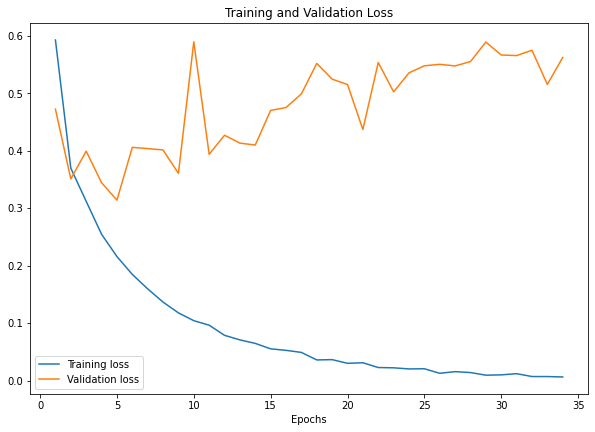

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

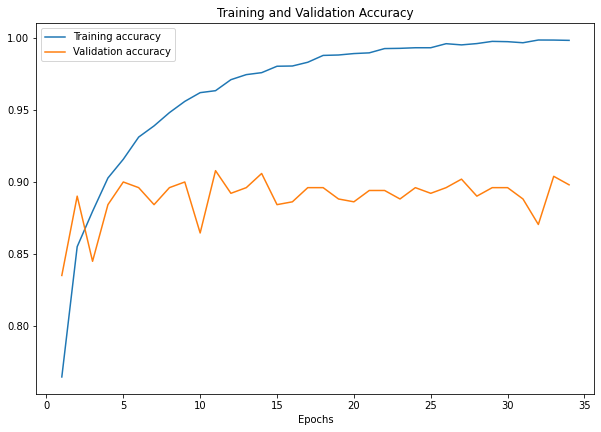

<Figure size 432x288 with 0 Axes>

In [18]:
epoch = range(1, len(v_accuracy)+1)
fig = plt.figure(figsize=(10, 15))
plt.subplot(2,1,2)
plt.plot(epoch, t_losses, label='Training loss')
plt.plot(epoch, v_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.show()

fig = plt.figure(figsize=(10, 15))
plt.subplot(2,1,2)
plt.plot(epoch, t_accuracy, label='Training accuracy')
plt.plot(epoch, v_accuracy, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()

In [ ]:
#From Last epoch
model.eval()
y_label = []
y_predict = []

with torch.no_grad():
    for i,(images,labels) in enumerate(validation_data_loader):
        print(images.size)
        n = images.size(0)
        images = images.to(device)
        output = model(images)
        pred = torch.argmax(output, dim=1)
        y_label.extend(labels.cpu().numpy())
        y_predict.extend(pred.cpu().numpy())
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']

In [ ]:
from sklearn.metrics import classification_report

#Classification report
report = classification_report(y_label, y_predict, target_names=plot_labels)
print(report)

In [ ]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_true = y_label
y_pred = y_predict
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
# print("weighted Roc score: " + str(roc_auc_score(y_true,y_pred,multi_class='ovr',average='weighted')))

In [268]:
# np.save("./tripleteca/ylabel.npy",y_label)
# np.save("./tripleteca/ypred.npy",y_predict)


In [4]:
from pytorch_grad_cam import GradCAM, \
    HiResCAM, \
    ScoreCAM, \
    GradCAMPlusPlus, \
    AblationCAM, \
    XGradCAM, \
    EigenCAM, \
    EigenGradCAM, \
    LayerCAM, \
    FullGrad, \
    GradCAMElementWise

In [5]:
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    preprocess_image
from pytorch_grad_cam.ablation_layer import AblationLayerVit

In [6]:

from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
import cv2

In [7]:
target_layers = [model.stages[-1]]

In [8]:
image_path= "./gridcam/nv.jpg"
rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img,mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

In [9]:
input_tensor = input_tensor.to(device)
model.eval()
output = model(input_tensor)
print(output) #print output from crossentropy score

tensor([[-2.4483, -1.2954,  0.5774, -0.7641,  1.1586,  6.3986, -2.5054]],
       grad_fn=<AddmmBackward0>)


In [10]:
sm = torch.nn.Softmax(dim=1)
probabilities = sm(output) 
print(probabilities) #Converted to probabilities

tensor([[1.4243e-04, 4.5112e-04, 2.9353e-03, 7.6740e-04, 5.2488e-03, 9.9032e-01,
         1.3452e-04]], grad_fn=<SoftmaxBackward0>)


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
p= probabilities.cpu()
num = p.detach().numpy()

In [13]:
num= num[0]

In [17]:
sum =0

per =[]

for i in num:
    sum+=i
    per.append(i*100)


print(per)

[0.014243023179005831, 0.04511196166276932, 0.29353348072618246, 0.0767397927120328, 0.5248823203146458, 99.03203845024109, 0.013452333223540336]


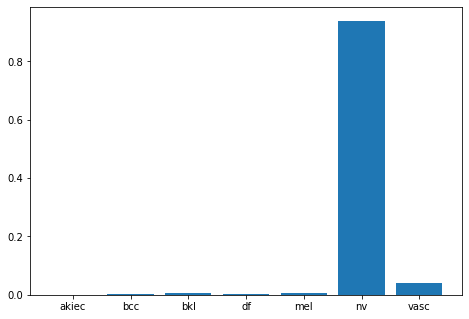

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
ax.bar(plot_labels,num)
plt.show()

In [310]:
 methods = \
        {"gradcam": GradCAM,
         "hirescam": HiResCAM,
         "scorecam": ScoreCAM,
         "gradcam++": GradCAMPlusPlus,
         "ablationcam": AblationCAM,
         "xgradcam": XGradCAM,
         "eigencam": EigenCAM,
         "eigengradcam": EigenGradCAM,
         "layercam": LayerCAM,
         "fullgrad": FullGrad,
         "gradcamelementwise": GradCAMElementWise}


In [311]:
targets = None

    # Using the with statement ensures the context is freed, and you can
    # recreate different CAM objects in a loop.
cam_algorithm = methods["gradcam++"]
with cam_algorithm(model=model,target_layers=target_layers,use_cuda=True) as cam:
    cam.batch_size = 32
    grayscale_cam = cam(input_tensor=input_tensor,targets=targets,aug_smooth=True,eigen_smooth=True)

    # Here grayscale_cam has only one image in the batch
    grayscale_cam = grayscale_cam[0, :]

    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # cam_image is RGB encoded whereas "cv2.imwrite" requires BGR encoding.
    cam_image = cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)

In [312]:
cv2.imwrite("Grad_cam2.jpg", cam_image)


True

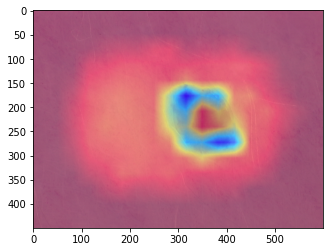

In [313]:
plt.imshow(cam_image)

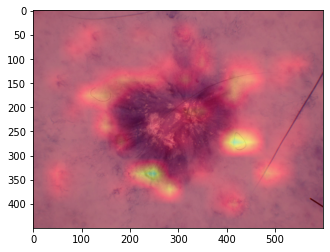

In [300]:
plt.imshow(cam_image)